In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file
data = pd.read_csv('overallwait.csv')
#remove all data rows that have 12 am as the time
data = data[data['TIME OF DAY'] != '12 AM']
# Create a list of months
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']


#data['HR'] = data['TIME OF DAY'].apply(lambda x: int(x.split(' ')[0]))
#data['AM/PM'] = data['TIME OF DAY'].apply(lambda x: x.split(' ')[1])
#data['HR'] = data.apply(lambda x: x['HR'] + 12 if x['AM/PM'] == 'PM' else x['HR'], axis=1)
#data['HR'] = data.apply(lambda x: 0 if (x['HR']==12 and x['AM/PM'] == 'AM') else x['HR'], axis=1)
#data = data.sort_values(by=['HR', 'AM/PM'])
#remove all data rows that have 24 as the time
#data = data[data['HR'] != 24]

#get all parks in a list
#add column to data for "park"
data['PARK'] = data['RIDE'].apply(lambda x: 'Magic Kingdom' if x in ['BIG THUNDER MOUNTAIN',  'JUNGLE CRUISE', 'SEVEN DWARFS MINE TRAIN', 'SPACE MOUNTAIN', 'PETER PAN\'S FLIGHT'] else ('Epcot' if x in ['FROZEN EVER AFTER', 'TEST TRACK', 'REMY"S RATATOUILLE ADVENTRUE'] else ('Hollywood Studios' if x in ['SLINKY DOG DASH', 'TOWER OF TERRROR', 'RISE OF RESISTANCE', 'MICKEY MINNIE RUNAWAY RAILWAY'] else ('Animal Kingdom' if x in ['AVATAR FLIGHT PASSAGE', 'EXPEDITION EVEREST', 'KILAMANJARO SAFARIS', "AVATAR NA'VI RIVER "] else 'Other'))))
magic_kingdom = data[data['PARK'] == 'Magic Kingdom']
animal_kingdom = data[data['PARK'] == 'Animal Kingdom']
epcot = data[data['PARK'] == 'Epcot']
hollywood_studios = data[data['PARK'] == 'Hollywood Studios']



In [2]:

def plot_wait_time_monthly(monthly_data, rides):
    plt.figure(figsize=(10, 6))  # Create a single figure for all rides
    
    for ride in rides:
        # Filter the data based on the ride
        ride_data = monthly_data[monthly_data['RIDE'] == ride]
        
        # Plot the wait time based on time of day
        plt.plot(ride_data['HR'], ride_data['AVERAGE WAIT TIME (MIN)'], label=ride)
        
    plt.xlabel('Time of Day (24-hour format)')
    plt.ylabel('Wait Time (in minutes)')
    plt.xlim(6, 24)
    plt.xticks(range(7, 24))
    plt.title('Wait Time by Time of Day')
    plt.legend()  # Add a legend to show the ride names
    plt.show()

In [3]:
import ipywidgets as widgets
from IPython.display import display

# Create a button for each month
buttons = [widgets.Button(description=month) for month in months]

# Create a function to handle button click event
def on_button_click(button):
    # Get the month from the button description
    month = button.description
    month_data = data[data['MONTH'] == month]
    month_data['HR'] = month_data['TIME OF DAY'].apply(lambda x: int(x.split(' ')[0]))
    month_data['AM/PM'] = month_data['TIME OF DAY'].apply(lambda x: x.split(' ')[1])
    month_data['HR'] = month_data.apply(lambda x: x['HR'] + 12 if x['AM/PM'] == 'PM' else x['HR'], axis=1)
    month_data['HR'] = month_data.apply(lambda x: 0 if (x['HR']==12 and x['AM/PM'] == 'AM') else x['HR'], axis=1)
    month_data = month_data.sort_values(by=['HR', 'AM/PM'])
    month_data = month_data[month_data['HR'] != 24]
    
    # Create a list of rides for the selected month
    rides = data['RIDE'].unique()
    # Create checkboxes for each ride
    checkboxes = [widgets.Checkbox(description=ride) for ride in rides]
    
    # Create a submit button
    submit_button = widgets.Button(description='Submit')
    
    # Create a function to handle submit button click event
    def on_submit_button_click(submit_button):
        # Get the selected rides
        selected_rides = [checkbox.description for checkbox in checkboxes if checkbox.value]
        # Plot wait time based on month and selected rides
        plot_wait_time_monthly(month_data, selected_rides)
    
    # Register the submit button click event
    submit_button.on_click(on_submit_button_click)
    
    # Display the checkboxes and submit button
    display(*checkboxes, submit_button)

# Register the button click events
for button in buttons:
    button.on_click(on_button_click)

# Display the buttons
display(*buttons)

Button(description='JAN', style=ButtonStyle())

Button(description='FEB', style=ButtonStyle())

Button(description='MAR', style=ButtonStyle())

Button(description='APR', style=ButtonStyle())

Button(description='MAY', style=ButtonStyle())

Button(description='JUN', style=ButtonStyle())

Button(description='JUL', style=ButtonStyle())

Button(description='AUG', style=ButtonStyle())

Button(description='SEP', style=ButtonStyle())

Button(description='OCT', style=ButtonStyle())

Button(description='NOV', style=ButtonStyle())

Button(description='DEC', style=ButtonStyle())

In [4]:
import folium

# Read the CSV file
ride_locations = pd.read_csv('location_data_disney.csv')

# Create a map centered at a specific location
map = folium.Map(location=[28.3852, -81.5639], zoom_start=12)

# Add markers for each ride location
for index, row in ride_locations.iterrows():
    folium.Marker([row['LAT'], row['LONG']], popup=row['RIDE']).add_to(map)

# Display the map
#map


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_heatmap(data, month):
    # Filter the data for the specified month
    month_data = data[data['MONTH'] == month]
    month_data['HR'] = month_data['TIME OF DAY'].apply(lambda x: int(x.split(' ')[0]))
    month_data['AM/PM'] = month_data['TIME OF DAY'].apply(lambda x: x.split(' ')[1])
    month_data['HR'] = month_data.apply(lambda x: x['HR'] + 12 if x['AM/PM'] == 'PM' else x['HR'], axis=1)
    month_data['HR'] = month_data.apply(lambda x: 0 if (x['HR']==12 and x['AM/PM'] == 'AM') else x['HR'], axis=1)
    month_data = month_data.sort_values(by=['HR', 'AM/PM'])
    #remove all data rows that have 24 as the time
    month_data = month_data[month_data['HR'] != 24]
    
    # Pivot the data to create a matrix of wait times for each ride and time of day
    pivot_data = month_data.pivot(index='RIDE', columns='HR', values='AVERAGE WAIT TIME (MIN)')
    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt=".0f", cbar=True)
    plt.title(f'Wait Time Heatmap for {month}')
    plt.xlabel('Time of Day')
    plt.ylabel('Ride')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()



/var/folders/vp/mwvb8h8169vfn5mc4bdcmnxr0000gn/T/ipykernel_85804/3968720523.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['HR'] = month_data['TIME OF DAY'].apply(lambda x: int(x.split(' ')[0]))
/var/folders/vp/mwvb8h8169vfn5mc4bdcmnxr0000gn/T/ipykernel_85804/3968720523.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['AM/PM'] = month_data['TIME OF DAY'].apply(lambda x: x.split(' ')[1])
/var/folders/vp/mwvb8h8169vfn5mc4bdcmnxr0000gn/T/ipykernel_85804/3968720523.py:9: SettingWit

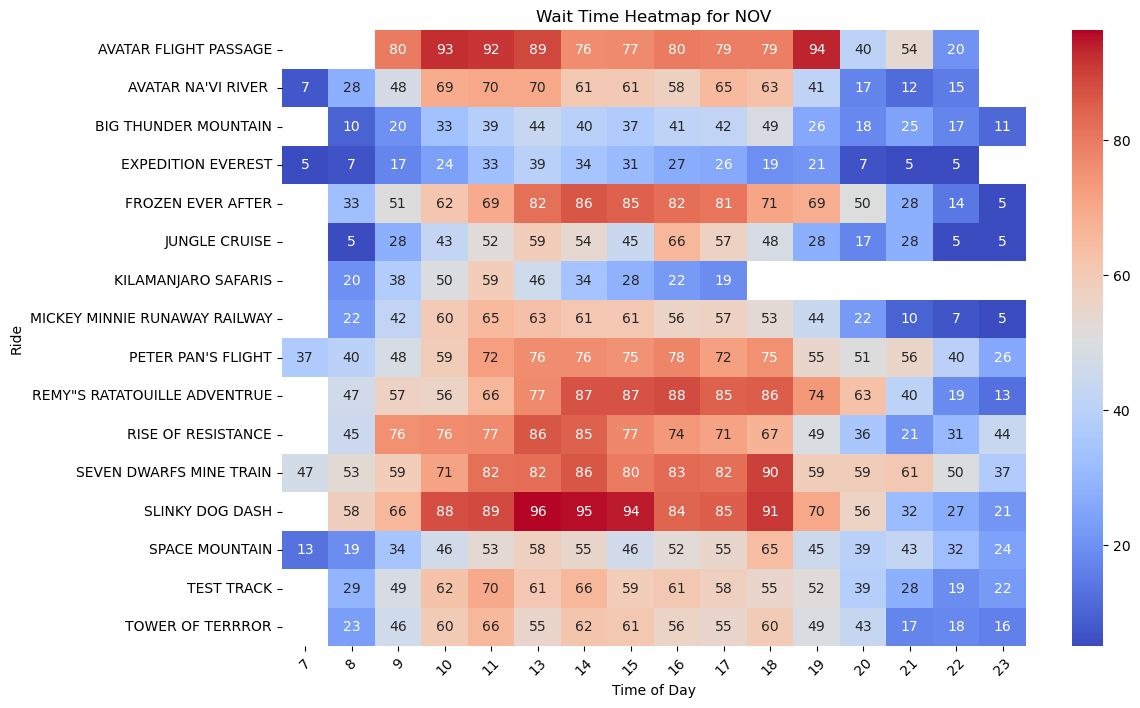

In [15]:
create_heatmap(data, 'NOV')

In [16]:
#for each ride, print the busiest time of day overall
for ride in data['RIDE'].unique():
    ride_data = data[data['RIDE'] == ride]
    busiest_time = ride_data[ride_data['AVERAGE WAIT TIME (MIN)'] == ride_data['AVERAGE WAIT TIME (MIN)'].max()]
    print(f'The busiest time for {ride} is {busiest_time.iloc[0]["TIME OF DAY"]} with an average wait time of {busiest_time.iloc[0]["AVERAGE WAIT TIME (MIN)"]} minutes')


#show distribution for time of day for each ride
for ride in data['RIDE'].unique():
    ride_data = data[data['RIDE'] == ride]
    plt.figure(figsize=(10, 6))
    sns.histplot(ride_data['HR'], kde=True)
    plt.title(f'Time of Day Distribution for {ride}')
    plt.xlabel('Time of Day (24-hour format)')
    plt.ylabel('Frequency')
    plt.show()


The busiest time for SEVEN DWARFS MINE TRAIN is 4 PM with an average wait time of 102.4065421 minutes
The busiest time for PETER PAN'S FLIGHT is 2 PM with an average wait time of 88.01988636 minutes
The busiest time for BIG THUNDER MOUNTAIN is 1 PM with an average wait time of 61.05059733 minutes
The busiest time for JUNGLE CRUISE is 6 PM with an average wait time of 70.62408223 minutes
The busiest time for SPACE MOUNTAIN is 6 PM with an average wait time of 81.9785575 minutes
The busiest time for FROZEN EVER AFTER is 4 PM with an average wait time of 95.7615894 minutes
The busiest time for REMY"S RATATOUILLE ADVENTRUE is 3 PM with an average wait time of 108.3898792 minutes
The busiest time for TEST TRACK is 11 AM with an average wait time of 80.90610048 minutes
The busiest time for AVATAR FLIGHT PASSAGE is 8 PM with an average wait time of 143.125 minutes
The busiest time for AVATAR NA'VI RIVER  is 11 AM with an average wait time of 88.92090395 minutes
The busiest time for KILAMANJAR

KeyError: 'HR'

<Figure size 1000x600 with 0 Axes>

In [ ]:

def create_correlation_heatmap(data, month):
    # Pivot the data to create a matrix of wait times for each ride and time of day
    month_data = data[data['MONTH'] == month]
    month_data['HR'] = month_data['TIME OF DAY'].apply(lambda x: int(x.split(' ')[0]))
    month_data['AM/PM'] = month_data['TIME OF DAY'].apply(lambda x: x.split(' ')[1])
    month_data['HR'] = month_data.apply(lambda x: x['HR'] + 12 if x['AM/PM'] == 'PM' else x['HR'], axis=1)
    month_data['HR'] = month_data.apply(lambda x: 0 if (x['HR']==12 and x['AM/PM'] == 'AM') else x['HR'], axis=1)
    month_data = month_data.sort_values(by=['HR', 'AM/PM'])
    #remove all data rows that have 24 as the time
    month_data = month_data[month_data['HR'] != 24]


    pivot_data = month_data.pivot(index='RIDE', columns='HR', values='AVERAGE WAIT TIME (MIN)')
    #put names of rides instead of numbers
    pivot_data.index = month_data['RIDE'].unique()
    # Calculate the correlation matrix
    correlation_matrix = pivot_data.corr()
    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
    plt.title(month + ' Correlation Heatmap: Wait Times vs Rides')
    plt.xlabel('Time of Day')
    plt.ylabel('Ride')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()


/var/folders/vp/mwvb8h8169vfn5mc4bdcmnxr0000gn/T/ipykernel_78534/2036569680.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['HR'] = month_data['TIME OF DAY'].apply(lambda x: int(x.split(' ')[0]))
/var/folders/vp/mwvb8h8169vfn5mc4bdcmnxr0000gn/T/ipykernel_78534/2036569680.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['AM/PM'] = month_data['TIME OF DAY'].apply(lambda x: x.split(' ')[1])
/var/folders/vp/mwvb8h8169vfn5mc4bdcmnxr0000gn/T/ipykernel_78534/2036569680.py:6: SettingWit

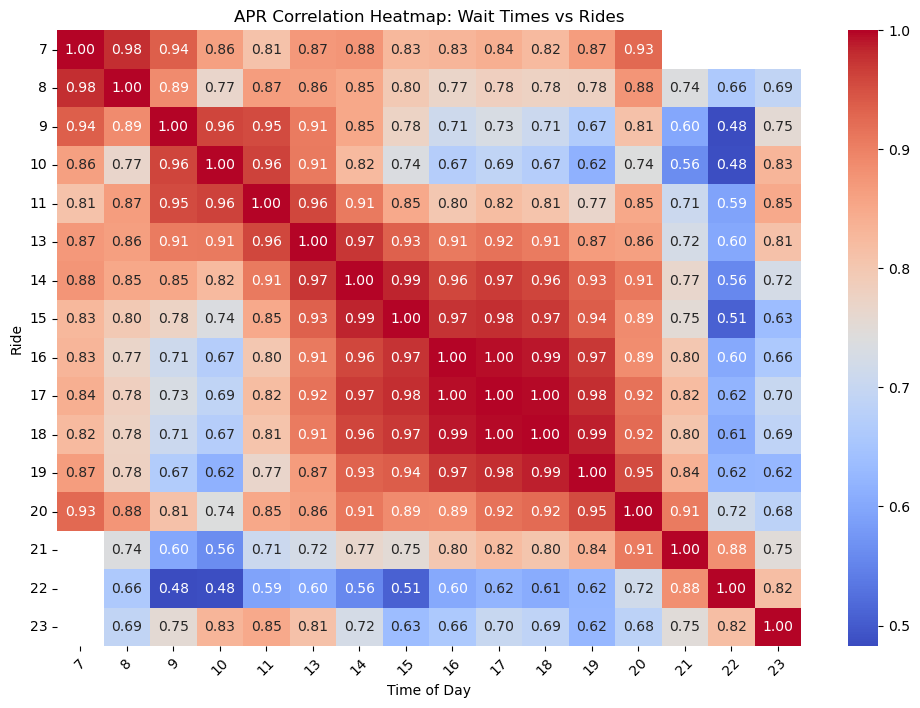

In [ ]:
#for month in months:
    #create_correlation_heatmap(data, month)
create_correlation_heatmap(data, 'APR')

In [ ]:
#find busiest month based on wait time
# Create a new DataFrame to store the total wait time for each month
def slowest_busiest_month(data):
    monthly_wait_time = pd.DataFrame(data.groupby('MONTH')['AVERAGE WAIT TIME (MIN)'].mean())
    # Sort the data to find the busiest month
    busiest_month = monthly_wait_time.sort_values('AVERAGE WAIT TIME (MIN)', ascending=False).head(1)
    #get average wait time instead of sum
    #  Sort the data to find the slowest month
    slowest_month = monthly_wait_time.sort_values('AVERAGE WAIT TIME (MIN)', ascending=True).head(1)
    print('busiest: ')
    print(busiest_month)
    print('slowest: ')
    print(slowest_month)

In [ ]:
#get all parks in a list
print('overall')
slowest_busiest_month(data)
print()
print('By Park')
parks = data['PARK'].unique()
for park in parks:
    print(park)
    park_data = data[data['PARK'] == park]
    slowest_busiest_month(park_data)
    print()


overall
busiest: 
       AVERAGE WAIT TIME (MIN)
MONTH                         
DEC                  62.086594
slowest: 
       AVERAGE WAIT TIME (MIN)
MONTH                         
SEP                  44.080052

By Park
Magic Kingdom
busiest: 
       AVERAGE WAIT TIME (MIN)
MONTH                         
APR                  58.314862
slowest: 
       AVERAGE WAIT TIME (MIN)
MONTH                         
SEP                  39.360776

Epcot
busiest: 
       AVERAGE WAIT TIME (MIN)
MONTH                         
DEC                  68.892718
slowest: 
       AVERAGE WAIT TIME (MIN)
MONTH                         
MAY                  48.646378

Animal Kingdom
busiest: 
       AVERAGE WAIT TIME (MIN)
MONTH                         
FEB                  62.986263
slowest: 
       AVERAGE WAIT TIME (MIN)
MONTH                         
SEP                  41.186435

Hollywood Studios
busiest: 
       AVERAGE WAIT TIME (MIN)
MONTH                         
FEB                  73.358893


In [ ]:
#find busiest time of day for each park
def busiest_time_of_day(data):
    # Create a new DataFrame to store the total wait time for each time of day
    time_of_day_wait_time = pd.DataFrame(data.groupby('HR')['AVERAGE WAIT TIME (MIN)'].mean())
    # Sort the data to find the busiest time of day
    busiest_time = time_of_day_wait_time.sort_values('AVERAGE WAIT TIME (MIN)', ascending=False).head(1)
    #  Sort the data to find the slowest time of day
    slowest_time = time_of_day_wait_time.sort_values('AVERAGE WAIT TIME (MIN)', ascending=True).head(1)
    print('busiest: ')
    print(busiest_time)
    print('slowest: ')
    print(slowest_time)

In [ ]:
#get all parks in a list
data['HR'] = data['TIME OF DAY'].apply(lambda x: int(x.split(' ')[0]))
data['AM/PM'] = data['TIME OF DAY'].apply(lambda x: x.split(' ')[1])
data['HR'] = data.apply(lambda x: x['HR'] + 12 if x['AM/PM'] == 'PM' else x['HR'], axis=1)
data['HR'] = data.apply(lambda x: 0 if (x['HR']==12 and x['AM/PM'] == 'AM') else x['HR'], axis=1)
data = data.sort_values(by=['HR', 'AM/PM'])
#remove all data rows that have 24 as the time
data = data[data['HR'] != 24]

print('overall')
busiest_time_of_day(data)
print()
print('By Park')
parks = data['PARK'].unique()
for park in parks:
    print(park)
    park_data = data[data['PARK'] == park]
    busiest_time_of_day(park_data)
    print()


ValueError: invalid literal for int() with base 10: 'OCT'

In [12]:
daily_data = pd.read_csv('daily_disney_wait.csv')
#highest wait day
highest_wait = daily_data[daily_data['AVG WAIT TIME (MIN)'] == daily_data['AVG WAIT TIME (MIN)'].max()]
print("highest wait time: " + str(highest_wait))
#lowest wait time
lowest_wait = daily_data[daily_data['AVG WAIT TIME (MIN)'] == daily_data['AVG WAIT TIME (MIN)'].min()]
print("lowest wait time: " + str(lowest_wait))

print()

#HOLIDAYS
#NEW YEARS
new_years = daily_data[daily_data['DAY'] == '1/1/24']
#MLK
mlk = daily_data[daily_data['DAY'] == '1/16/24']
#4TH JULY
july_4 = daily_data[daily_data['DAY'] == '7/4/23']
#LABOR DAY
labor_day = daily_data[daily_data['DAY'] == '9/4/23']
#MEMORIAL DAY
memorial_day = daily_data[daily_data['DAY'] == '5/29/23']
#THANKSGIVING
thanksgiving = daily_data[daily_data['DAY'] == '11/23/23']
#JUNETEENTH
juneteenth = daily_data[daily_data['DAY'] == '6/19/23']
#VERERANS DAY
veterans_day = daily_data[daily_data['DAY'] == '11/11/23']
#CHRISTMAS
christmas = daily_data[daily_data['DAY'] == '12/25/23']
#COLUMBUS DAY
columbus_day = daily_data[daily_data['DAY'] == '10/9/23']
#EASTER
easter = daily_data[daily_data['DAY'] == '4/9/23']

holidays = [new_years, mlk, july_4, labor_day, memorial_day, thanksgiving, juneteenth, veterans_day, christmas, columbus_day, easter]
#find the wait time for each holiday
for holiday in holidays:
    print(holiday)

print("highest wait time for holiday: new years (approx 74 min avg wait time)")
print("lowest wait time for holiday: labor day (approx 38 min avg wait time)")









highest wait time:           DAY  AVG WAIT TIME (MIN)
332  12/30/23           118.113874
lowest wait time:           DAY  AVG WAIT TIME (MIN)
288  11/16/23             28.25772

        DAY  AVG WAIT TIME (MIN)
334  1/1/24            74.126181
         DAY  AVG WAIT TIME (MIN)
349  1/16/24            51.303022
        DAY  AVG WAIT TIME (MIN)
153  7/4/23             44.31318
        DAY  AVG WAIT TIME (MIN)
215  9/4/23            38.433869
         DAY  AVG WAIT TIME (MIN)
117  5/29/23            53.853195
          DAY  AVG WAIT TIME (MIN)
295  11/23/23            70.532135
         DAY  AVG WAIT TIME (MIN)
138  6/19/23            63.915264
          DAY  AVG WAIT TIME (MIN)
283  11/11/23            65.864862
          DAY  AVG WAIT TIME (MIN)
327  12/25/23             60.41171
         DAY  AVG WAIT TIME (MIN)
250  10/9/23            70.725215
       DAY  AVG WAIT TIME (MIN)
67  4/9/23             66.85537
highest wait time for holiday: new years (approx 74 min avg wait time)
lowest 